Prior to the python script, facebook data was downloaded from personal facebook profile to local drive in json format. From the downloaded data, the file was then saved to the same directory as the project.

In [1]:
#  First, we import the python libraries that we will be working with.
import pandas as pd                         # to enables us to read, explore, and work with .json file formats and dataframes.
import matplotlib.pyplot as plt             # to enable us to make interactive visualization of the final results.
import seaborn as sns                       # to enable us to make informative settings for visualization.
import numpy as np                          # to enable us to perform numerical operations.

Reading the dataset

In [2]:
#  Now, we read our downloaded data and assign it to a dataframe using pandas.
df = pd.read_json('/kaggle/input/facebook-posts-data/your_posts_1.json')          # to enable us read the json file.
print(df.head())                                # to view the first 5 entries of our dataframe to ensure that the downloaded data is readable.

            timestamp                                               data  \
0 2011-11-20 15:44:54  [{'post': 'Holla guyz....
    I apologise 4 no...   
1 2011-12-22 11:42:52  [{'post': 'Nawapa pole wahanga wa mafuriko kok...   
2 2011-12-27 15:00:31  [{'post': 'Hey geez 'n' guyz!Holla out there,,...   
3 2011-12-28 06:57:48  [{'post': 'Guyz 'n' geez!!hop u al gud out dea...   
4 2012-01-02 23:41:05  [{'post': 'Hi people!its 2012...lets strategis...   

  attachments title tags  
0         NaN   NaN  NaN  
1         NaN   NaN  NaN  
2         NaN   NaN  NaN  
3         NaN   NaN  NaN  
4         NaN   NaN  NaN  


Data cleaning and EDA

In [3]:
#  After viewing our dataframe, we need to perform some data cleaning to ensure that we are only using the data we need.
df.shape
df.rename(columns={'timestamp':'date'}, inplace=True)       # to change the column name "timestamp" to "date".
print(df.columns)                                           # to view all the columns within our dataframe.
df1 = df.drop(['attachments', 'title', 'tags'], axis=1)      # to drop columns from our dataframe that won't be needed for analysis.
print(df1)                                                   # to view the cleaned dataframe we will be working with.
df1.to_excel('Downloaded Data_clean.xlsx')                   # to save the cleaned dataframe to .xlsx with desired name.

Index(['date', 'data', 'attachments', 'title', 'tags'], dtype='object')
                   date                                               data
0   2011-11-20 15:44:54  [{'post': 'Holla guyz....
    I apologise 4 no...
1   2011-12-22 11:42:52  [{'post': 'Nawapa pole wahanga wa mafuriko kok...
2   2011-12-27 15:00:31  [{'post': 'Hey geez 'n' guyz!Holla out there,,...
3   2011-12-28 06:57:48  [{'post': 'Guyz 'n' geez!!hop u al gud out dea...
4   2012-01-02 23:41:05  [{'post': 'Hi people!its 2012...lets strategis...
..                  ...                                                ...
453 2022-11-20 07:55:22  [{'post': 'Privileged to join the internalizat...
454 2022-12-05 20:48:55  [{'post': 'Seasons greeting from @welcomecente...
455 2022-12-13 13:06:37  [{'post': 'Welcoming y'all to ths cgristmas sa...
456 2022-12-14 00:21:20  [{'post': '"...we went through fire and throug...
457 2023-01-19 15:57:37                 [{'update_timestamp': 1674143857}]

[458 rows x 2 columns]


In [4]:
#  Now that we have cleaned our data. We need to count our posts monthly from 2011 to 2023.
pd.to_datetime(df1['date'])                            # first we assign the "date" column as a datetime.
df2 = df.set_index(df['date']).resample('MS').size()  # setting the date as the index, grouping it by months, and counting the posts in each month.
df2.to_excel('Monthly Posts Count.xlsx')              # saving the dataframe to .xlsx with desired name.
print(df2)                                            # to view the saved dataframe.

date
2011-11-01    1
2011-12-01    3
2012-01-01    3
2012-02-01    1
2012-03-01    0
             ..
2022-09-01    1
2022-10-01    1
2022-11-01    1
2022-12-01    3
2023-01-01    1
Freq: MS, Length: 135, dtype: int64


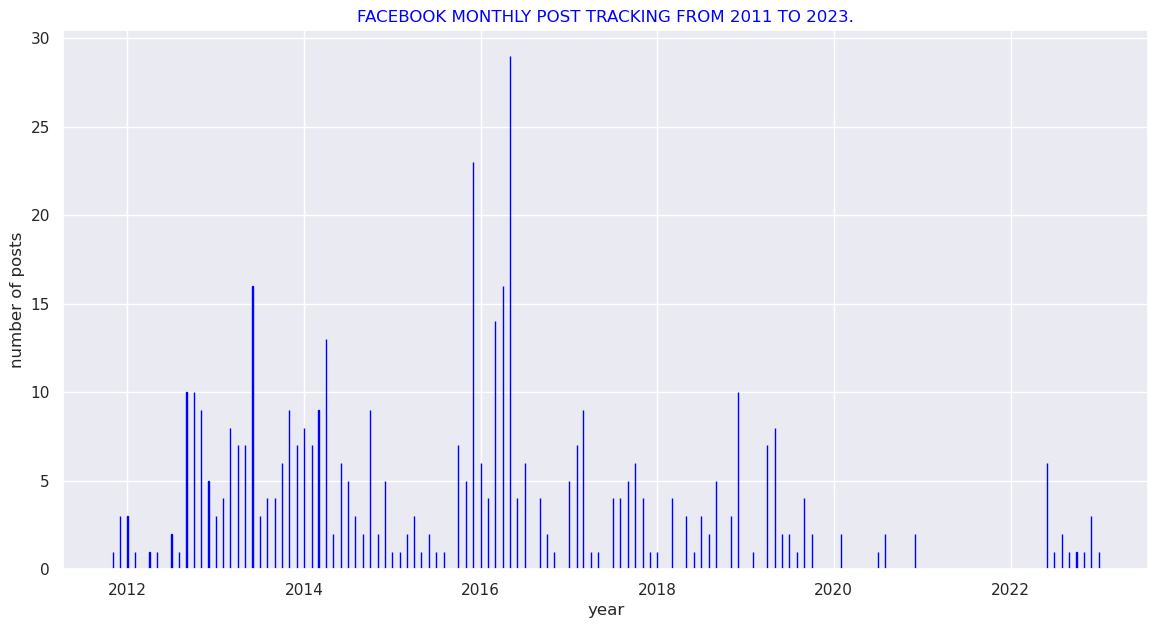

In [5]:
#  Now to the good part, we can do some visualization.
sns.set(rc={'figure.figsize':(14,7)})                                           # setting the size/dimensions of the entire graph.
sns.set(font_scale=1)                                                           # setting the scale of the graph and fontsize of text.
y = df2                                                                         # assigning df1 to variable y.
x = df2.index                                                                   # assigning df1.index to variable x.
plt.bar(x, y, edgecolor="blue", color="blue")                                   # plotting bar graph of x against y with colors.
plt.xlabel('year')                                                              # adding label to the x-axis.
plt.ylabel('number of posts')                                                   # adding label to the y-axis.
tick_position = np.arange(10, len(x), step=24)                                  # assigning the tick positions to the years.
plt.title('FACEBOOK MONTHLY POST TRACKING FROM 2011 TO 2023.', color="blue")    # Adding the title of the graph.
plt.savefig('Monthly Posts.png')                                                # saving the plotted bar graph as an image.
plt.show()                                                                      # displaying the plotted bar graph.

From the visualization, each bar represents a single month within a year.
From the plot, insights provide that this facebook user had generally been an active user. First activity was in 2011, followed by a steady increase in activity in 2012, 2013, and 2014 respectively. In 2015, there was a decline in facebook activity to a net zero; before a huge spike in 2016 which was the user's highest recorded facebook activity in the entire 10 years of tracked data. Nevertheless, the user has been on and off the platform eversince with zero activity throughout the year 2021 before resurfacing again in the 3rd and 4th quarter of 2022.